# Porto Seguro Data Challenge
https://www.kaggle.com/competitions/porto-seguro-data-challenge/overview

Você provavelmente já recebeu uma ligação de telemarketing oferecendo um produto que você não precisa. Essa situação de estresse é minimizada quando você oferece um produto que o cliente realmente precisa.

Nessa competição você será desafiado a construir um **modelo que prediz a probabilidade de aquisição de um produto**\.

## Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score

## Definição de Funções

In [2]:
def generate_performance_stats(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("Accuracy: {}\n".format(metrics.accuracy_score(y_test,y_pred)))
    print("F1-score: {}\n".format(metrics.f1_score(y_test, y_pred)))
    print("Confusion Matrix: \n{}\n".format(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])))

## Carregar a base de dados

In [3]:
raw_data = pd.read_csv('../input/train.csv', sep=',')

In [4]:
raw_data.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,...,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,8,4,110,1986,13684,7189,-999,-999,17,3,...,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,30,0,39,1019,10232,678,791,16,-999,3,...,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,43,20,39,1751,2689,8235,1042,13,10,1,...,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,46,7,44,2262,29428,6031,304,16,-999,3,...,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1


In [5]:
raw_data.shape

(14123, 70)

In [6]:
# Exibindo os tipos de cada feature (coluna)
raw_data.dtypes

id         int64
var1       int64
var2       int64
var3       int64
var4       int64
          ...   
var65    float64
var66    float64
var67    float64
var68    float64
y          int64
Length: 70, dtype: object

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14123 entries, 0 to 14122
Data columns (total 70 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      14123 non-null  int64  
 1   var1    14123 non-null  int64  
 2   var2    14123 non-null  int64  
 3   var3    14123 non-null  int64  
 4   var4    14123 non-null  int64  
 5   var5    14123 non-null  int64  
 6   var6    14123 non-null  int64  
 7   var7    14123 non-null  int64  
 8   var8    14123 non-null  int64  
 9   var9    14123 non-null  int64  
 10  var10   14123 non-null  int64  
 11  var11   14123 non-null  int64  
 12  var12   14123 non-null  int64  
 13  var13   14123 non-null  int64  
 14  var14   14123 non-null  int64  
 15  var15   14123 non-null  int64  
 16  var16   14123 non-null  int64  
 17  var17   14123 non-null  int64  
 18  var18   14123 non-null  int64  
 19  var19   14123 non-null  int64  
 20  var20   14123 non-null  int64  
 21  var21   14123 non-null  int64  
 22

**Não existem valores faltantes NA (not available), mas parecem terem sido substituídos por -999**

In [8]:
raw_data.describe()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
count,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,...,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000
mean,17474.649366,9.712667,23.966579,1584.671245,15179.176025,5543.697869,1315.314168,-109.713729,-138.426680,-106.362388,...,-458.540340,-24.210294,0.073086,0.779221,0.028778,-862.721979,-862.762111,-41.252803,-2.154825,0.201798
std,10249.066602,7.269559,218.429664,1118.101765,9994.295223,3329.493664,1210.074896,350.202420,371.128392,311.608454,...,497.945633,154.485314,0.053963,0.234068,0.018681,342.956927,342.855920,199.275514,48.244171,0.401357
min,1.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,0.000000,0.000000,0.004267,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,8550.500000,4.000000,38.000000,731.000000,6493.500000,2374.000000,482.000000,16.000000,10.000000,1.000000,...,-999.000000,0.169428,0.040391,0.706357,0.018357,-999.000000,-999.000000,0.117647,0.136029,0.000000
50%,17464.000000,5.000000,53.000000,1461.000000,15309.000000,6159.000000,1558.000000,33.000000,24.000000,3.000000,...,0.009003,0.239625,0.060265,0.877901,0.023480,-999.000000,-999.000000,0.176471,0.176471,0.000000
75%,26358.500000,18.000000,110.000000,2481.000000,23818.000000,8594.000000,2438.000000,35.000000,27.000000,3.000000,...,0.152328,0.341919,0.088831,0.930373,0.034581,-999.000000,-999.000000,0.264706,0.220588,0.000000
max,35306.000000,30.000000,129.000000,3546.000000,32403.000000,11373.000000,3001.000000,36.000000,28.000000,3.000000,...,1.000000,0.934994,0.814846,1.000000,0.387386,1.000000,1.000000,0.911765,1.000000,1.000000


In [9]:
#Deletar a coluna id
raw_data.drop(['id'], axis=1, inplace=True)

In [10]:
#Preparar um df para plotar a proporção das classes
df_plot = raw_data.groupby("y").agg(
    y_count=('y', 'count')
)
df_plot = df_plot.reset_index().drop(['y'], axis=1)
df_plot

,y_count
0,11273
1,2850


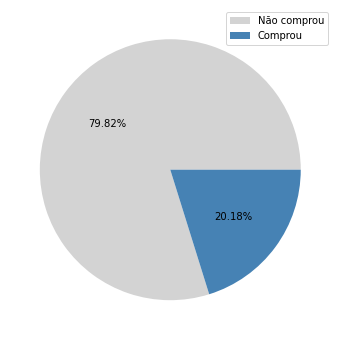

In [11]:
ax = df_plot.plot.pie(y='y_count', labels=['',''], autopct="%.2f%%", colors=['lightgray', 'steelblue'], figsize=(6,6))
ax.set_ylabel("")
ax.legend(loc=1, labels=['Não comprou', 'Comprou'])
plt.show()

**Base de dados desbalanceda**

## Primeira abordagem
Treinar modelos mantendo a base desbalanceada.
80% para treinamento - 20% para validação

In [12]:
# Checkpoint da base de dados bruta
df_prep = raw_data.copy()

In [23]:
# Separar uma base para validação
X_train, X_val = train_test_split(df_prep, test_size=0.20, random_state=13)

In [24]:
df_plot = X_val.groupby("y").agg(
    y_count=('y', 'count')
)
df_plot = df_plot.reset_index().drop(['y'], axis=1)
df_plot

,y_count
0,2257
1,568


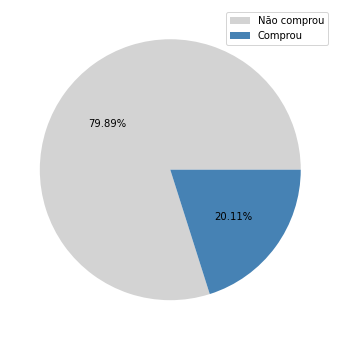

In [25]:
ax = df_plot.plot.pie(y='y_count', labels=['',''], autopct="%.2f%%", colors=['lightgray', 'steelblue'], figsize=(6,6))
ax.set_ylabel("")
ax.legend(loc=1, labels=['Não comprou', 'Comprou'])
plt.show()

In [28]:
df_prep.shape

(14123, 69)

In [29]:
# Número de linhas e colunas da base de treinamento
X_train.shape

(11298, 69)

In [30]:
# Número de linhas e colunas da base de validação
X_val.shape

(2825, 69)

In [31]:
# Separar o target das bases
y_train = X_train['y'].values
X_train = X_train.drop(['y'], axis=1)

y_val = X_val['y'].values
X_val = X_val.drop(['y'], axis=1)

In [32]:
# Treinar um modelo usando um algoritmo de árvore de decisão
clf = DecisionTreeClassifier(random_state=13)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=13)

In [33]:
y_val_pred = clf.predict(X_val)
y_val_predProba = clf.predict_proba(X_val)

In [34]:
y_val_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
y_val_predProba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [36]:
#Avaliar o modelo com base em algumas métricas de desempenho
generate_performance_stats(y_val, y_val_pred)

Accuracy: 0.7968141592920354

F1-score: 0.5102389078498294

Confusion Matrix: 
Predicted     0    1
Actual              
0          1952  305
1           269  299



### Obter as features mais importantes

In [37]:
df_featImport = pd.DataFrame(columns=['feature', 'feat_importance'])

In [38]:
df_featImport['feature'] = X_val.columns
df_featImport['feat_importance'] = clf.feature_importances_
df_featImport = df_featImport.sort_values(by='feat_importance', ascending=False)
df_featImport[0:10]

,feature,feat_importance
3,var4,0.277934
7,var8,0.064438
6,var7,0.037877
55,var56,0.030828
54,var55,0.030096
2,var3,0.028013
58,var59,0.024840
61,var62,0.024818
11,var12,0.023273
34,var35,0.021361


## Testar o modelo na base de teste

In [39]:
# Utilizar toda a base de treinamento para treinar o modelo final (treinamento + validação)
X_train = df_prep.copy()
y_train = df_prep['y']
X_train.drop(['y'], axis=1, inplace=True)

In [40]:
# Treinar o modelo final
clf = DecisionTreeClassifier(random_state=13)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=13)

In [41]:
# Carregar a base de teste
X_test = pd.read_csv('../input/test.csv', sep=',')

In [42]:
X_test.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68
0,0,5,126,1353,28956,743,1289,27,-999,1,...,0.201839,0.353965,0.166641,0.049108,0.986882,0.016683,-999.0,-999.0,0.176471,0.253676
1,2,6,126,1446,7803,5151,935,35,-999,3,...,0.072127,0.074555,0.217009,0.144403,0.892028,0.038323,-999.0,-999.0,0.147059,0.099265
2,4,5,44,243,4325,1109,1903,33,24,1,...,0.324770,0.384992,0.330680,0.072864,0.930373,0.021052,-999.0,-999.0,0.294118,0.136029
3,7,4,53,419,743,7750,183,35,-999,3,...,0.131070,-999.000000,0.244936,0.158088,0.986882,0.022649,-999.0,-999.0,0.294118,0.220588
4,15,4,126,1863,22693,5625,965,9,-999,3,...,0.225166,0.059940,0.252794,0.080405,0.944501,0.021806,-999.0,-999.0,0.352941,0.113971


In [43]:
X_test.shape

(21183, 69)

In [44]:
# Deletar a coluna id
X_test.drop(['id'], axis=1, inplace=True)

In [45]:
# Realizar a predição
y_pred = clf.predict(X_test)

In [46]:
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

## Criar arquivo para submissão

In [47]:
df_submission = pd.read_csv('../input/submission_sample.csv', sep=',')
df_submission.head()

,id,predicted
0,0,1
1,2,1
2,4,1
3,7,0
4,15,1


In [48]:
df_submission['predicted'] = y_pred
df_submission.head()

,id,predicted
0,0,1
1,2,1
2,4,0
3,7,0
4,15,0


In [49]:
# Salvar o arquivo para submissão
df_submission.to_csv('../output/benchmark.csv', index=False, sep=",", encoding='utf-8')